# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To display the maximum rows and columns
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)

In [4]:
# To create a DataFrame through pandas
df = pd.read_csv("AutoInsurance.csv")

In [5]:
# Shape of the dataset (number of rows & columns)
print("The number of rows: ",df.shape[0])
print("The number of columns: ",df.shape[1])

The number of rows:  9134
The number of columns:  24


# Checking Null values

In [6]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has {df[col].isnull().sum()} null values.")
    
print("Data is cleaned")

Data is cleaned


# Checking Duplicate records

In [7]:
# Check for the duplicates records in DataFrame
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicates record found: ")
    print(duplicates)
    
    # Drop duplicates record
    df.drop_duplicates(inplace=True)
    print("DataFrame after droping duplicates")
    print(df)
    
else:
    print("No Duplicate records found")

No Duplicate records found


In [8]:
# To display the records in the dataset from the top
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Checking datatypes for each features

In [9]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Checking the outliers

In [10]:
numerical_cols = df.select_dtypes(include=["float64","int64"])

for col in numerical_cols:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = numerical_cols[(numerical_cols[col] < Q1 - 1.5 * IQR) | (numerical_cols[col] > Q3 + 1.5 * IQR)]
    if not outliers.empty:
        print(f"outliers fount in {col} : ", outliers.shape[0])

# To print the shape of the dataset before removing the outliers
print("")
print("Number of rows and columns : ",numerical_cols.shape)

outliers fount in Customer Lifetime Value :  817
outliers fount in Monthly Premium Auto :  430
outliers fount in Number of Open Complaints :  1882
outliers fount in Number of Policies :  416
outliers fount in Total Claim Amount :  453

Number of rows and columns :  (9134, 8)


# Handling the outliers

In [11]:
for col in numerical_cols:
    Q1 = numerical_cols[col].quantile(0.25)
    Q3 = numerical_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    numerical_cols = numerical_cols[(numerical_cols[col] >= lower_bound) & (numerical_cols[col] <= upper_bound)]
    
# To print the shape of the dataset after removing the outliers
print("")
print(f"Their are {numerical_cols.shape[0]} number of rows and {numerical_cols.shape[1]} columns after removing the outliers.")


Their are 5888 number of rows and 8 columns after removing the outliers.


In [12]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [13]:
numerical_cols.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [14]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# Summary Statistics of Numerical features

In [15]:
numerical_cols.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


# Exploratory Data Analysis(EDA):

# Univariate Analysis

## Employment Status

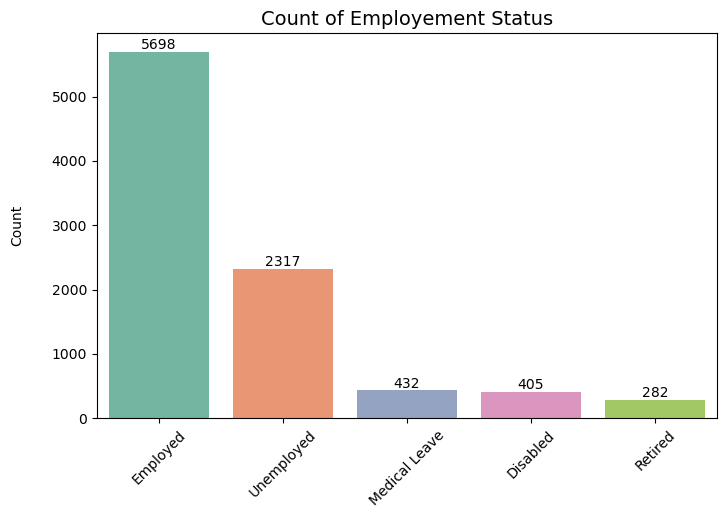

In [16]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="EmploymentStatus", palette='Set2')
plt.title("Count of Employement Status", fontsize=14)
plt.ylabel('Count', labelpad=20, fontsize=10)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')

# Policy Name

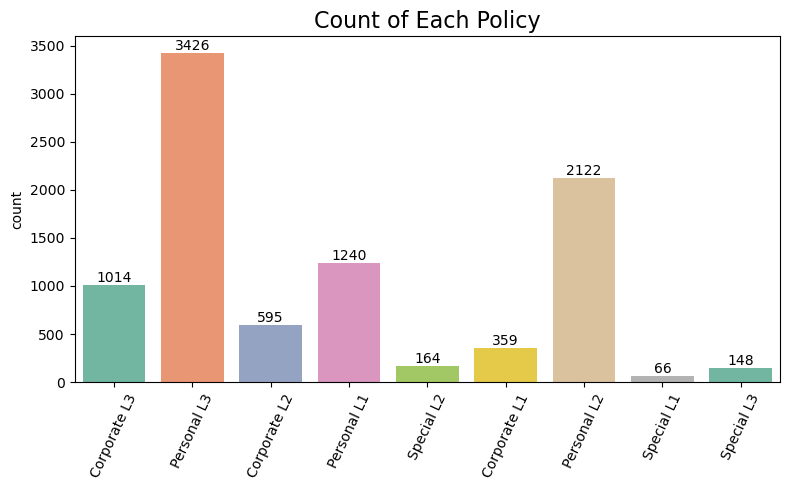

In [17]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Policy", palette="Set2")
plt.title("Count of Each Policy", fontsize=16)
plt.xticks(rotation=65)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

# Gender

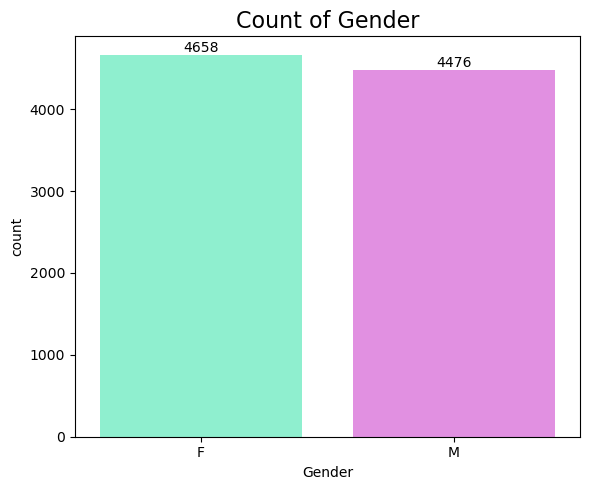

In [18]:
# To determine figure size
fig, ax = plt.subplots(figsize=(6,5))

# To create a countplot
sns.countplot(df, x="Gender", palette=['aquamarine','violet'])
plt.title("Count of Gender", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

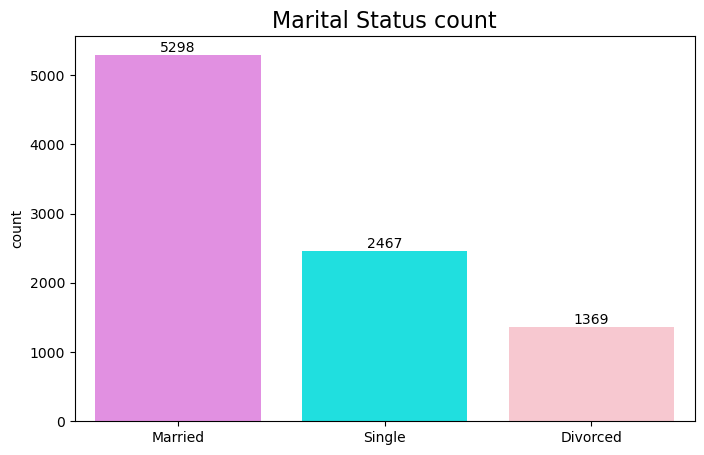

In [19]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Marital Status", palette=["violet","cyan","pink"])
plt.title("Marital Status count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Policy Type

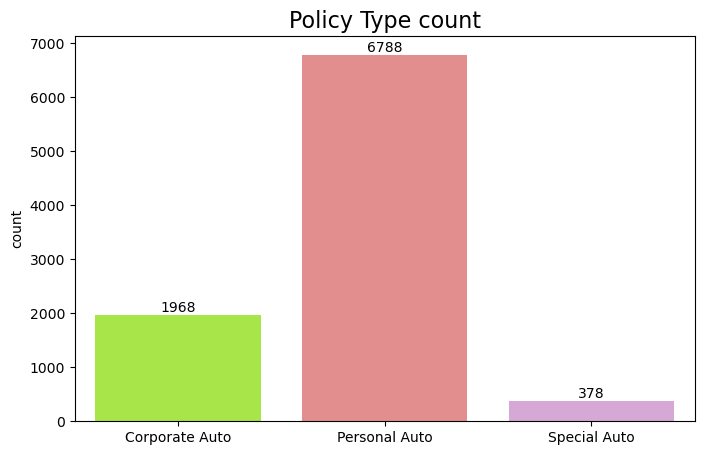

In [20]:
# To determine figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Policy Type", palette=["greenyellow","lightcoral","plum"])
plt.title("Policy Type count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Vehicle Size

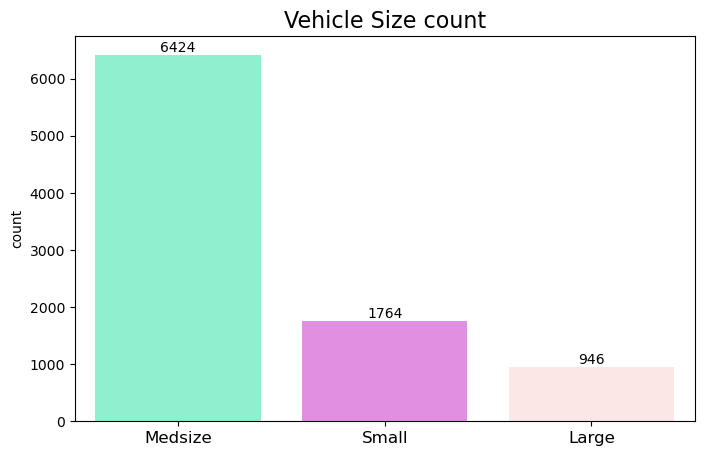

In [21]:
# To determine a figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Vehicle Size", palette=["aquamarine", "violet", "mistyrose"])
plt.xticks(fontsize=12)
plt.title("Vehicle Size count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Vehicle Class

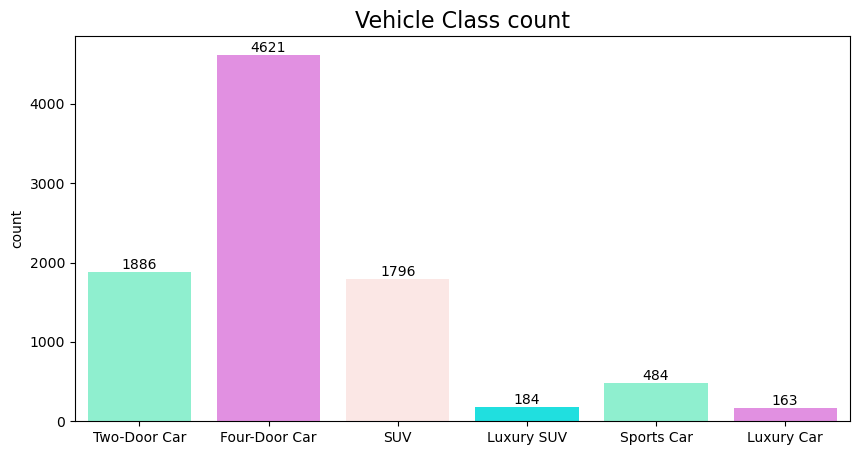

In [22]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(10,5))

# To create a countplot
sns.countplot(df, x="Vehicle Class", palette=["aquamarine", "violet", "mistyrose", "cyan"])
plt.title("Vehicle Class count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# State

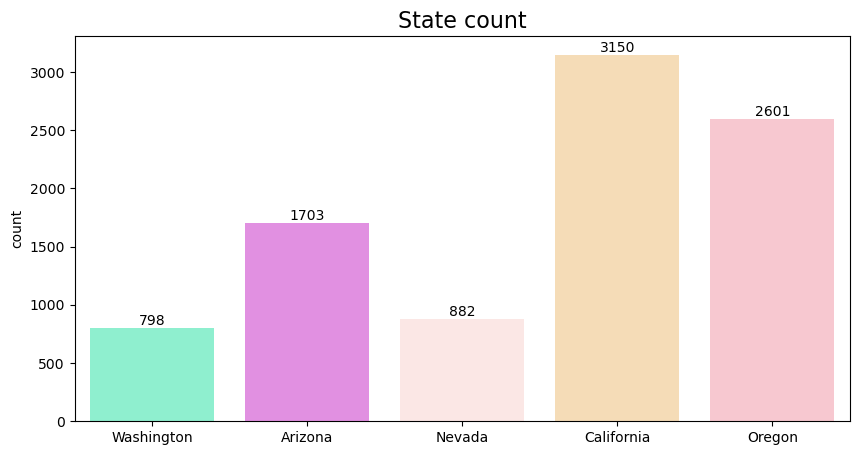

In [23]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(10,5))

# To create a countplot
sns.countplot(df, x="State", palette=["aquamarine","violet","mistyrose","navajowhite","pink"])
plt.title("State count", fontsize=16)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Location

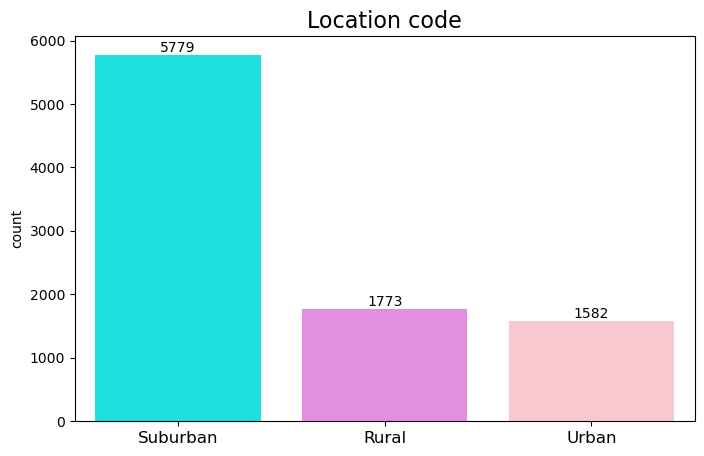

In [24]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Location Code", palette=["cyan","violet","pink"])
plt.title("Location code", fontsize=16)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

# Coverage

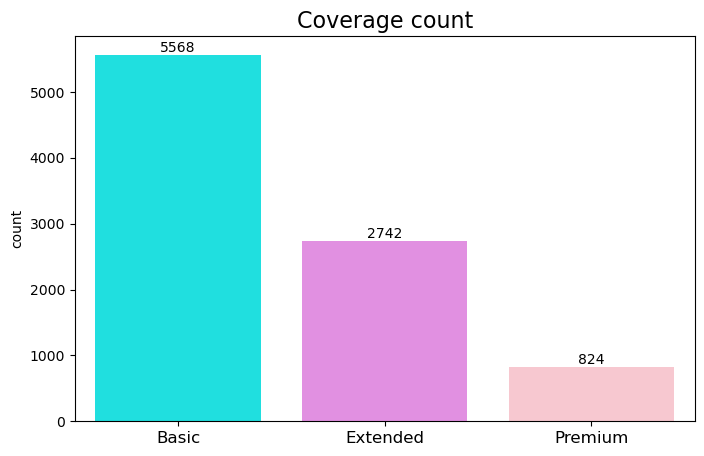

In [25]:
# To determine the figure size
fig, ax = plt.subplots(figsize=(8,5))

# To create a countplot
sns.countplot(df, x="Coverage", palette=["cyan","violet","pink"])
plt.title("Coverage count", fontsize=16)
plt.xticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
    ax.set_xlabel("")

Distribution plot of the CLV (Customer Lifetime Value) variable. The distribution is highly skewed to the right, meaning that the majority of customers have a low CLV, while a small number of customers have a very high CLV

In [26]:
df["Customer Lifetime Value"].skew()

3.0322802599299847

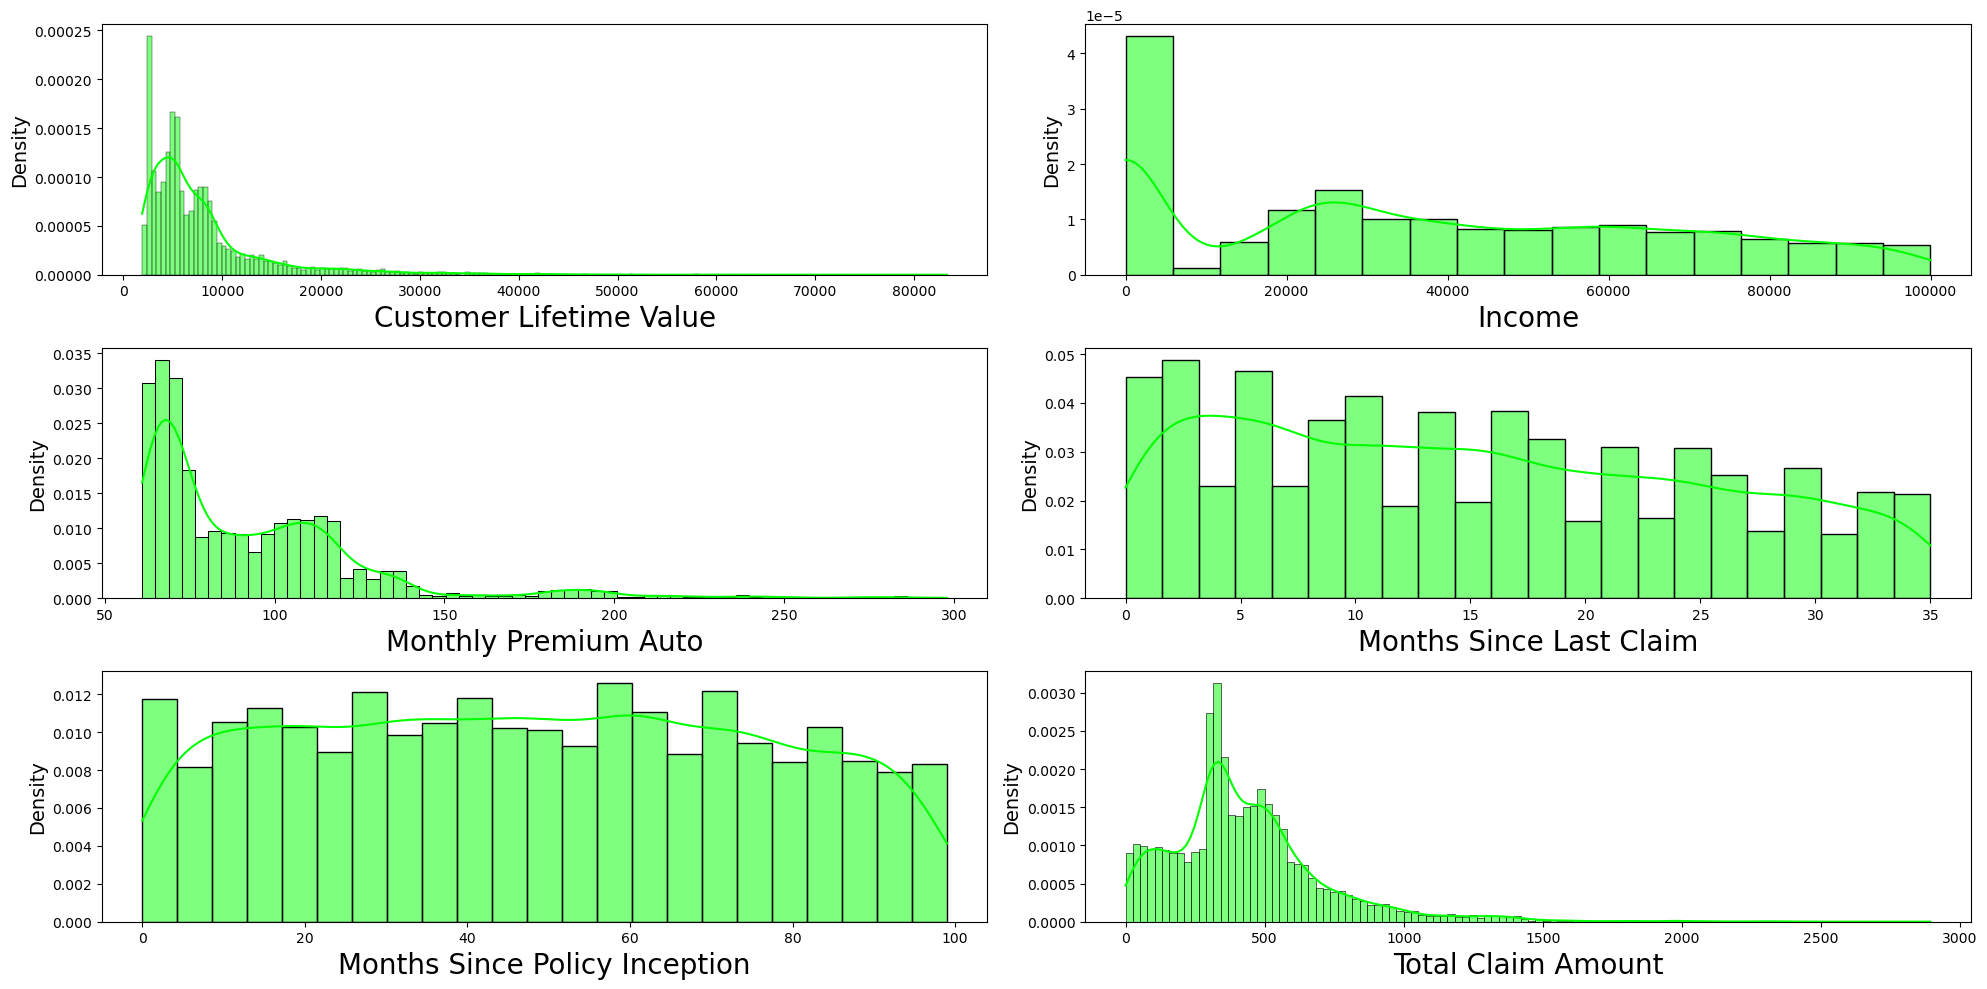

In [27]:
numerical_cols = df.select_dtypes(include=["float64", "int64"])
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"], axis=1)

# To determine the figure size
plt.figure(figsize=(20,10))

# To create a histogram plot for all the numerical features
for count,i in enumerate(numerical_cols):
    plt.subplot(3,2,count+1)
    sns.histplot(numerical_cols, x=i, kde=True, stat='density', color='lime')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()

The distribution of 6 numerical features:

* **Customer Lifetime Value:** This distribution is right skewed, meaning there are more customers with a lower lifetime value and few customers with a higher lifetime value.

* **Income:** This distribution is also right skewed, meaning there are more customers with lower income and few customers with higher income.

* **Monthly Premium Auto:** This distribution is also right skewed, meaning there are more customers with a lower monthly premium and few customers with higher monthly premium.

* **Months Since Last Claim:** This distribution is slightly right skewed, meaning there are more customers who have filed a claim recently and few customers who have not filed a claim for a long time.

* **Months Since Policy Inception:** This distribution is uniform with a slight peak around 10 and 60 months. 

* **Total Claim Amount:** This distribution is also right skewed, meaning there are more customers with lower claim amount and few customers with a higher claim amount.


# Boxplot of numerical features

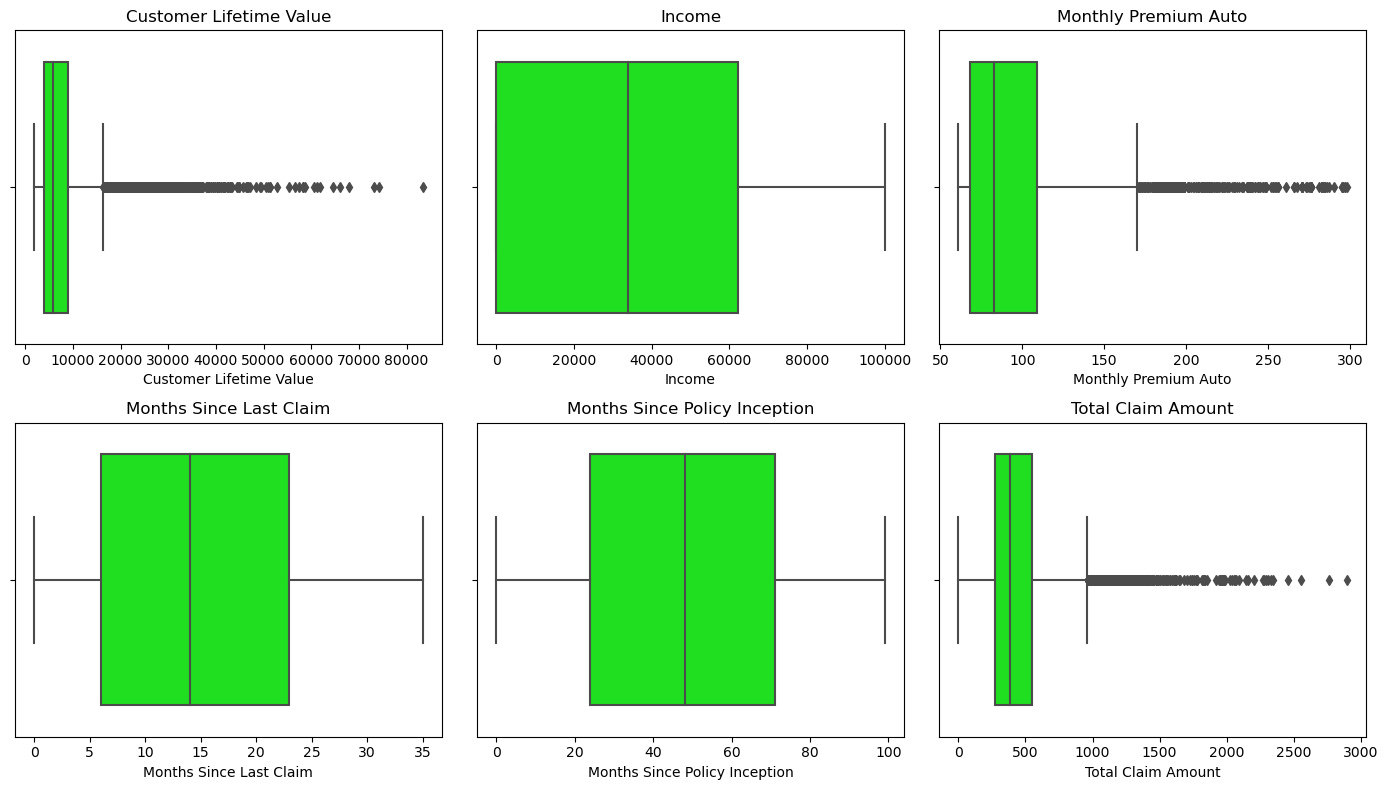

In [28]:
# To determine the subplots and figure size
fig, axes = plt.subplots(2,3, figsize=(14,8))
axes = axes.flatten()

# To create a Boxplot for all the numerical features.
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x=numerical_cols[col], ax=axes[i], color="lime")
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

From the above boxplots we can observe the outliers in ["Customer Lifetime Value" , "Monthly Premium Auto", "Total Claim Amount"]

# Pie-Chart

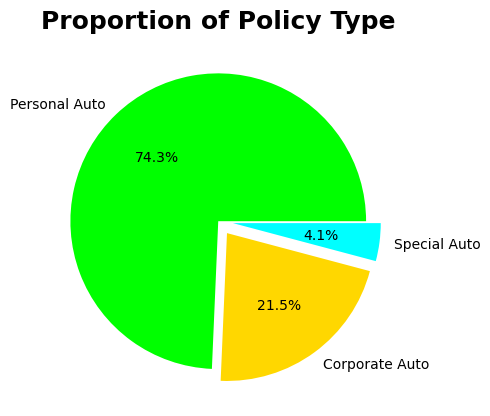

In [14]:
# To determine the value counts of categorical data
category_counts = df['Policy Type'].value_counts()

color = ["lime","gold","cyan"]
explode = [0,0.1,0.1]

# To create a pie-chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=color, explode = explode)
plt.title('Proportion of Policy Type', fontsize=18, fontweight='bold')
plt.show()

# Pie-Chart

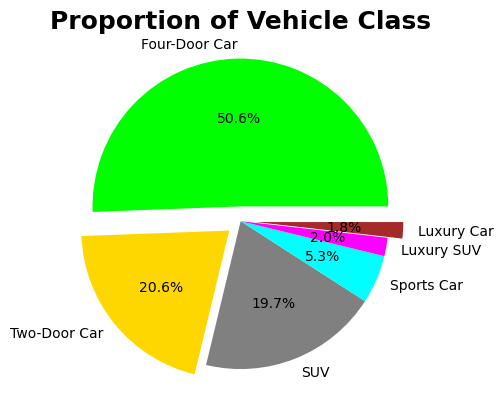

In [130]:
# To determine the value counts of categorical data
category_counts = df['Vehicle Class'].value_counts()

color = ["lime","gold","grey","cyan","magenta","brown"]
explode = [0.1,0.1,0,0,0,0.1]

# To create a pie-chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=color, explode=explode)
plt.title('Proportion of Vehicle Class', fontsize=18, fontweight='bold')
plt.show()

# Bivariate Analysis

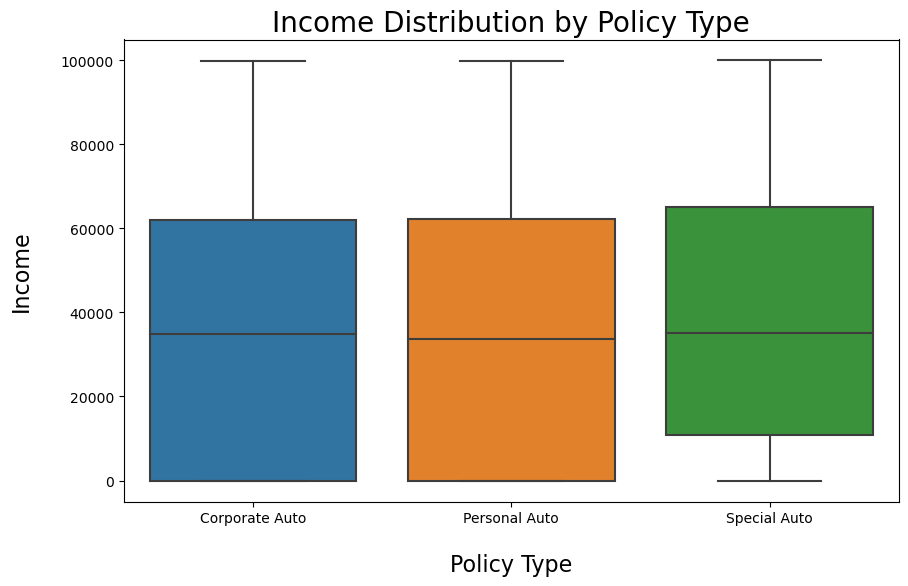

In [135]:
# To determine a figure size
plt.figure(figsize=(10,6))

# To create a boxplot
sns.boxplot(x='Policy Type', y='Income', data=df)
plt.title('Income Distribution by Policy Type', fontsize=20)
plt.xlabel('Policy Type', labelpad=20, fontsize=16)
plt.ylabel('Income', labelpad=20, fontsize=16)
plt.show()

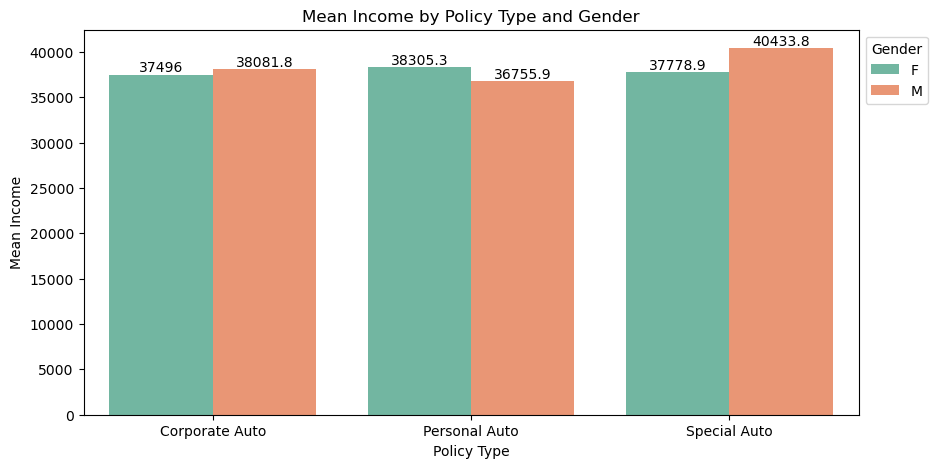

In [137]:
# To determine figure size and subplot
fig, ax = plt.subplots(figsize=(10,5))

# To create a barplot
sns.barplot(x='Policy Type', y='Income', hue='Gender', data=df, palette='Set2', errorbar=None)
plt.title('Mean Income by Policy Type and Gender')
plt.xlabel('Policy Type')
plt.ylabel('Mean Income')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
for container in ax.containers:
    ax.bar_label(container)
plt.show()

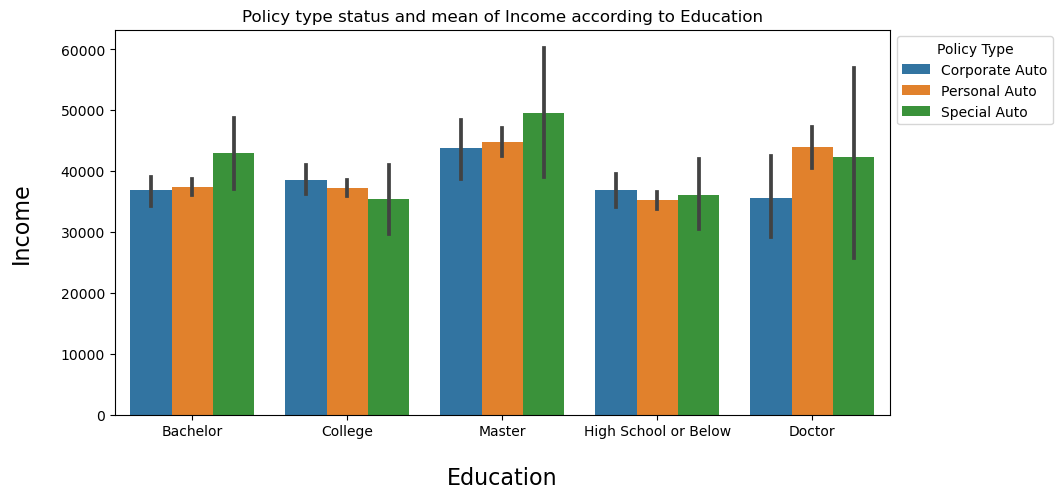

In [139]:
# To determine a figure size
plt.figure(figsize=(10,5))

# To create a barplot
sns.barplot(x='Education', y='Income', hue='Policy Type', data=df)
plt.title('Policy type status and mean of Income according to Education')
plt.xlabel('Education',labelpad=20, fontsize=16)
plt.ylabel('Income', labelpad=20, fontsize=16)
plt.legend(title='Policy Type', bbox_to_anchor=(1, 1))
plt.show()

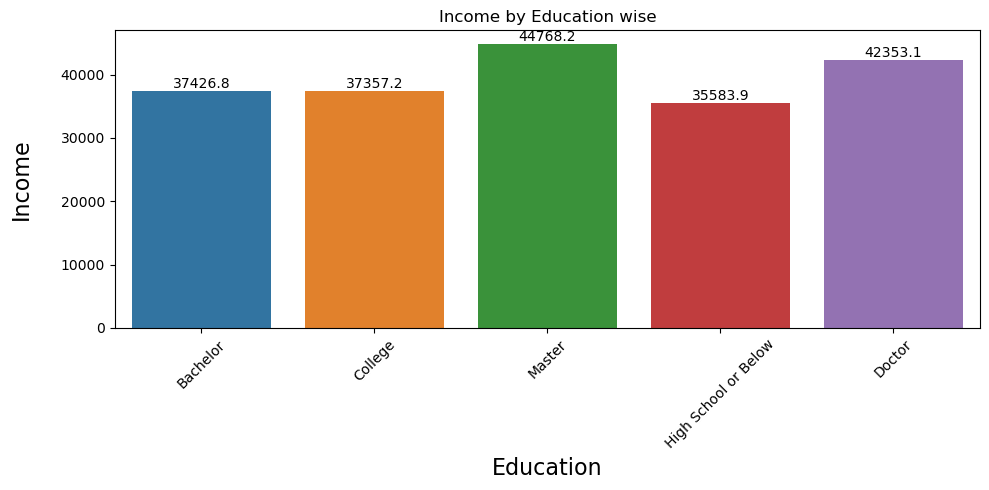

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(df, x="Education", y="Income", errorbar=None)
plt.title("Income by Education wise")
plt.xlabel('Education',fontsize=16)
plt.ylabel('Income',labelpad=20, fontsize=16)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

In [25]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


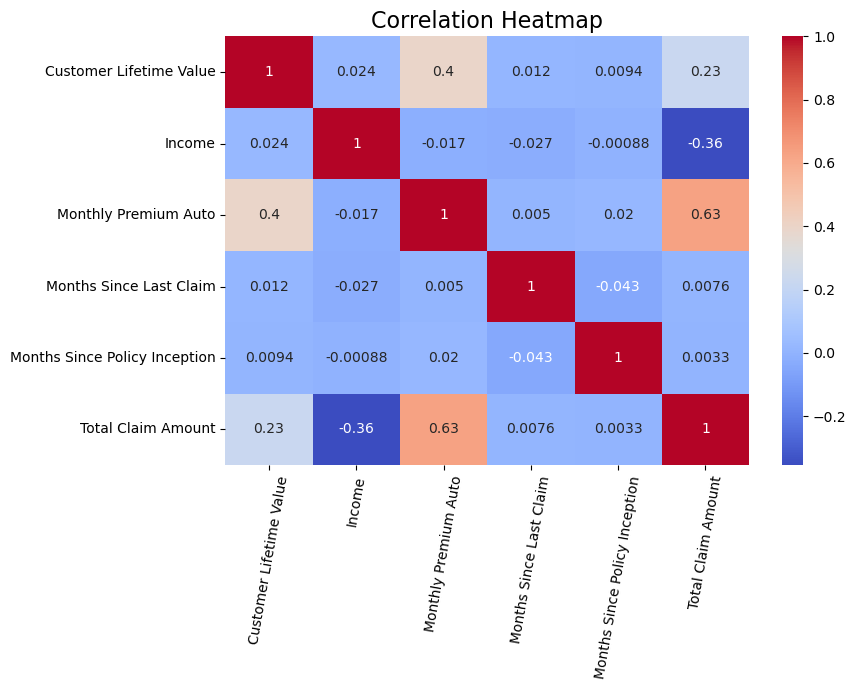

In [147]:
# To determine the figure size
plt.figure(figsize=(9, 7))

# To create a Correlation Heatmap
sns.heatmap(numerical_cols.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relationship between CLV vs Monthly Premium Auto')

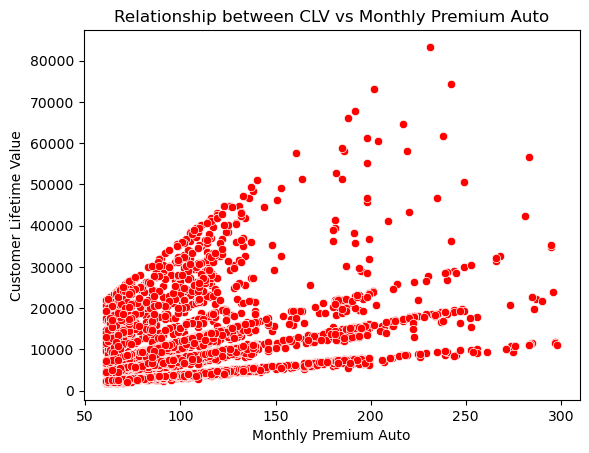

In [148]:
sns.scatterplot(df, x="Monthly Premium Auto", y="Customer Lifetime Value", color='r')
plt.title("Relationship between CLV vs Monthly Premium Auto")

Text(0.5, 1.0, 'Relationship between Monthly Premium Auto vs Total Claim Amount')

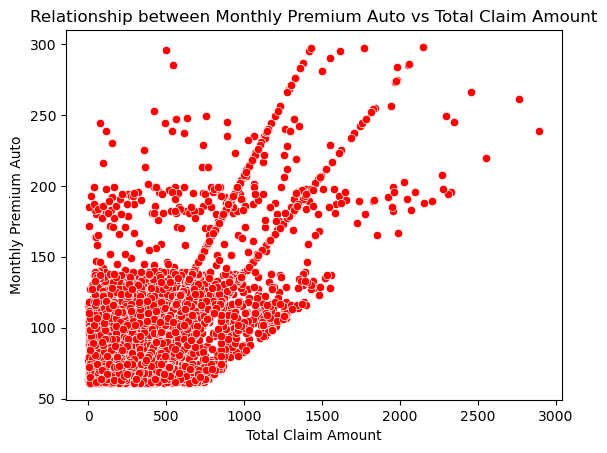

In [29]:
sns.scatterplot(df, x="Total Claim Amount", y="Monthly Premium Auto", color='r')
plt.title("Relationship between Monthly Premium Auto vs Total Claim Amount")

Text(0.5, 1.0, 'Relationship between Total Claim Amount vs CLV')

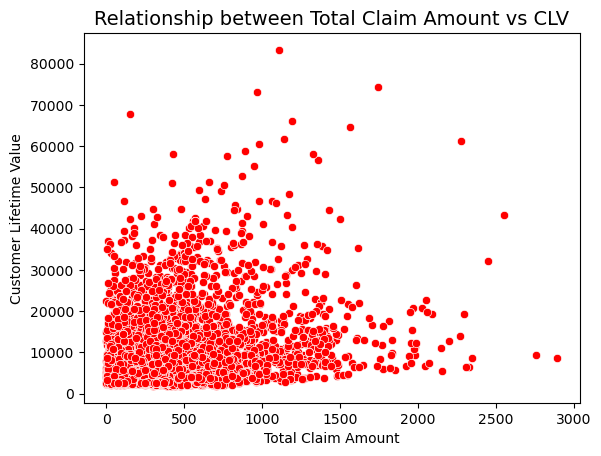

In [30]:
sns.scatterplot(df, x="Total Claim Amount", y="Customer Lifetime Value", color='r')
plt.title("Relationship between Total Claim Amount vs CLV", fontsize=14)

# Model Building

In [31]:
numerical_cols = df.select_dtypes(include=["float64","int64"])

x = numerical_cols.drop(['Customer Lifetime Value'],axis=1)
y = numerical_cols['Customer Lifetime Value']

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

In [57]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
# Model Score for Train data
lm.score(x_train,y_train)

0.15079540545121173

In [55]:
# Model Score for Test data
lm.score(x_test,y_test)

0.1535385616269086

# Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
df_new = df

# Convert the 'Effective To Date' column to datetime format
df_new['Effective To Date'] = pd.to_datetime(df_new['Effective To Date'])

# Convert the reference date to numpy datetime64
ref_date = np.datetime64('2022-01-01')

# Convert the 'Effective To Date' column to the number of days since the reference date
df_new['Effective To Date'] = (df_new['Effective To Date'] - ref_date).astype(np.int64)

In [61]:
# one-hot encoding to categorical variables
df_new = pd.get_dummies(df_new, columns=['EmploymentStatus', 'Gender', 'Policy Type', 'Vehicle Class', 'Vehicle Size'])

In [62]:
# Select the features and target variable
x = df_new.drop(['Customer Lifetime Value', 'Response', 'Customer', 'State', 'Coverage', 'Education', 'Location Code', 
                 'Marital Status', 'Renew Offer Type', 'Sales Channel', 'Policy'], axis=1)
y = df_new['Customer Lifetime Value']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [184]:
x.head()

,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-342489600000000000,56274,69,32,5,0,1,384.811147,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False
1,-344563200000000000,0,94,13,42,0,8,1131.464935,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False
2,-342921600000000000,48767,108,18,38,0,2,566.472247,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False
3,-345513600000000000,0,106,18,65,0,7,529.881344,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False
4,-341971200000000000,43836,73,12,44,0,1,138.130879,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False


In [69]:
# Train a Decision Tree Regression model
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=11, random_state=44)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=11, random_state=44)

In [70]:
dt_reg.score(x_train,y_train)

0.6939827438181605

In [71]:
dt_reg.score(x_test,y_test)

0.650766344055081

In [188]:
# Make predictions on the testing set
y_pred = dt_reg.predict(x_test)
y_pred

array([ 3868.84580695,  5520.79368877,  3530.19633169,  7234.63329175,
       11580.4383618 , 11580.4383618 ,  5520.79368877,  5520.79368877,
        4954.92480378,  5520.79368877,  7234.63329175,  8473.45287974,
        4954.92480378,  3168.85263064,  4954.92480378,  7234.63329175,
       18827.71911124, 24134.35894362,  2388.93667343,  5520.79368877,
        2388.93667343,  3530.19633169,  2633.11141547,  6382.59878922,
       11580.4383618 ,  2633.11141547,  3868.84580695, 11580.4383618 ,
        2863.98783358, 11580.4383618 ,  2863.98783358,  8473.45287974,
        2633.11141547,  2633.11141547,  6276.33323115,  5520.79368877,
        6382.59878922, 16866.79000436,  5520.79368877,  2863.98783358,
       18827.71911124,  2633.11141547,  3530.19633169,  4954.92480378,
       11580.4383618 ,  2633.11141547,  2633.11141547,  6382.59878922,
        3530.19633169, 11580.4383618 , 10156.86980391,  4514.93347139,
       18827.71911124,  5520.79368877,  2633.11141547,  2388.93667343,
      

In [189]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 18048987.79
R2: 0.65


In [190]:
# Tune the hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10, 15]}
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')

Best parameters: {'max_depth': 5, 'min_samples_leaf': 15}
Best score: -15004940.82


# Random Forest regressor

Creating and Training the Model

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [164]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [172]:
# Model score for Training data
rf_regressor.score(x_train,y_train)

0.9549662847643674

In [173]:
# Model score for Test data
rf_regressor.score(x_test,y_test)

0.7100141057228525

# Prediction from our Model

In [174]:
# This is basically a test data
x_test

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2673,99185,115,8,19,0,3,449.428182
221,93870,69,1,96,0,8,331.200000
2720,78441,103,6,73,0,2,613.866905
8169,49182,70,6,86,0,2,165.410515
4824,0,69,7,90,0,8,806.534801
6011,42600,115,10,78,0,3,660.136987
7804,94851,104,6,33,0,3,190.998822
2666,0,74,0,52,0,1,355.200000
7226,30535,66,22,18,0,2,94.142294
8145,67798,69,1,78,0,9,331.200000


In [175]:
# This is actual data
y_test

2673     9369.639891
221      5473.159870
2720    12375.021630
8169     8436.350708
4824     4713.404623
6011     9233.190660
7804     8283.843281
2666     2767.594900
7226    20930.052170
8145     5548.031892
4171     3574.990725
4263    14206.980910
2041     9148.877887
5617     4795.387295
7826     2659.705650
574      5162.116944
1314     8324.232710
6322     4083.560673
7258     5049.118385
8058    11981.984810
409     20216.308830
7254    41787.903430
5740     2821.448707
1958     3209.663044
6477     4078.290374
3535     7610.540153
8953     6656.150470
5684     6599.081932
7051    17441.637800
7925     5846.520588
5302     4896.271406
3583     2877.813846
8197     4627.090729
658      3435.250080
3359     4944.088762
6750     5423.136755
5785     3887.324208
6904    34611.378960
68       6846.150323
3663     8104.503269
7303    64618.757150
7002    32144.649570
7934     3438.949322
8475     4938.727660
2405     9393.968332
2738    16045.109520
2672     5133.414764
3916     2797

In [176]:
y_pred = rf_regressor.predict(x_test)

np.set_printoptions(threshold=np.inf)

# This is the value which the model is predicting
print(y_pred)

[ 9285.53342211  5577.6746017  16066.4161177  12883.07221615
  4854.52844091  9163.87487884  8357.09876334  2667.32806792
 10298.78279974  5548.031892    3547.26878495 14457.80449412
  9014.91619729  4784.40183156  2662.64657008  5135.23458423
  8581.06590954  4067.74306138  4937.6146156  12033.27275706
 32542.7980312  41787.4744603   2911.918489    3192.37158441
  4106.238458   11145.70001731  6656.54298154  6244.00022806
 17435.4532907   5798.72795919  5183.82493555  2912.83025089
  4963.58720497  3432.05686384  4828.75520347  5306.12515634
  3880.54309493 34213.7820002   6846.150323    8027.25535625
 37338.3951521  15691.0652584   3409.01112105  4994.43310449
  9148.16422037 10814.41168751  5074.56255224  2789.30550974
 17187.08387407  2719.01990425  3468.67772475 16517.61777609
  6066.29963189  2694.98655612  4881.32689743  6296.42355691
  4999.33677724  5927.53666457  2319.79414234 13336.5681794
  7705.49789507 16376.7172257   2398.7335598   8659.28240432
  5274.72479171  4413.019

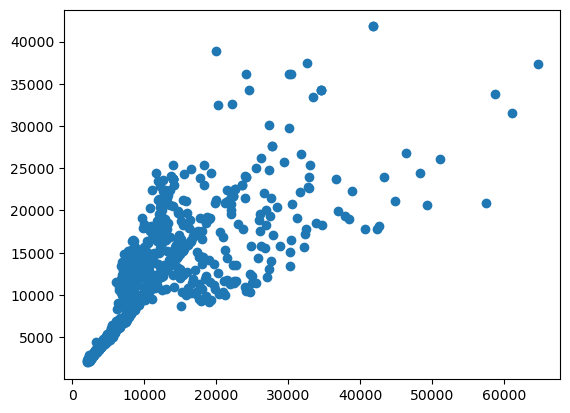

In [178]:
plt.scatter(y_test,y_pred)

# Residual Histogram

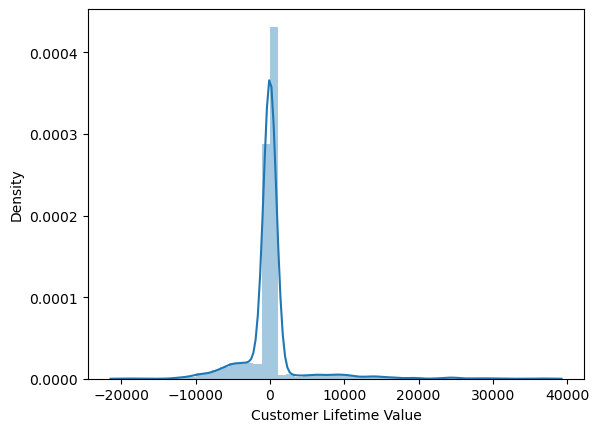

In [179]:
sns.distplot((y_test-y_pred),bins=50);